# Spectrogram Test
In this notebook, we will experiment with transforming our raw dataset into a series of spectrogram images. 

We will also be using this notebook to not only experiment but to create a script that will be included in the ```Omega``` framework.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
from gwpy.timeseries import TimeSeries

In [9]:
from numpy.random import random

In [3]:
# downloading our sample data
data = TimeSeries.fetch_open_data(
    'H1', 'Sep 14 2015 09:45', 'Sep 14 2015 09:55'
)

In [4]:
type(data)

gwpy.timeseries.timeseries.TimeSeries

In [16]:
print(data)

TimeSeries([ 1.11697978e-19,  1.26610050e-19,  1.26059199e-19,
            ..., -4.50779841e-19, -3.99724242e-19,
            -4.06747343e-19]
           unit: dimensionless,
           t0: 1126259117.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [11]:
# creating random time-series
random(1000)

array([0.51739483, 0.65242144, 0.11720584, ..., 0.92851858,
       0.92888716, 0.00798191])

In [14]:
t = TimeSeries(random(1000))

In [17]:
print(t)

TimeSeries([0.74608021, 0.92959258, 0.4069171 , ..., 0.59032516,
            0.75013545, 0.13737629]
           unit: dimensionless,
           t0: 0.0 s,
           dt: 1.0 s,
           name: None,
           channel: None)


[]

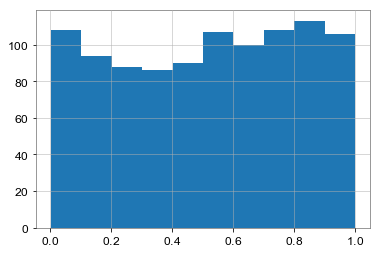

In [63]:
plt.hist(random(1000))
plt.plot()

In [20]:
random(1000)

array([0.42833722, 0.56735645, 0.36808491, ..., 0.0703336 ,
       0.87726853, 0.26625642])

In [22]:
TimeSeries.spectrogram?

Signature:
TimeSeries.spectrogram(
    self,
    stride,
    fftlength=None,
    overlap=None,
    window='hann',
    method='welch',
    nproc=1,
    **kwargs,
)
Docstring:
Calculate the average power spectrogram of this `TimeSeries`
using the specified average spectrum method.

Each time-bin of the output `Spectrogram` is calculated by taking
a chunk of the `TimeSeries` in the segment
`[t - overlap/2., t + stride + overlap/2.)` and calculating the
:meth:`~gwpy.timeseries.TimeSeries.psd` of those data.

As a result, each time-bin is calculated using `stride + overlap`
seconds of data.

Parameters
----------
stride : `float`
    number of seconds in single PSD (column of spectrogram).

fftlength : `float`
    number of seconds in single FFT.

overlap : `float`, optional
    number of seconds of overlap between FFTs, defaults to the
    recommended overlap for the given window (if given), or 0

window : `str`, `numpy.ndarray`, optional
    window function to apply to timeseries prior to

In [23]:
specgram = data.spectrogram(2, fftlength=1, overlap=.5) ** (1/2.)

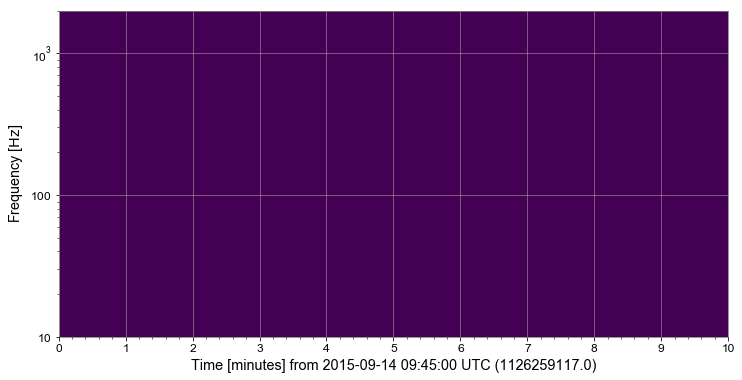

In [59]:
# plotting
plot = specgram.imshow(norm='log', vmin=0.000001, vmax=.999999)
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 2000)
plot.show()

In [66]:
t = TimeSeries(random(1000))

C:\Users\dmber\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


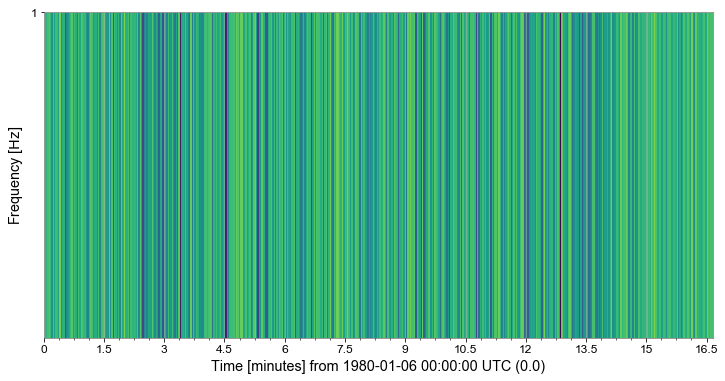

In [72]:
# specgram_t = t.spectrogram(2, fftlength=2, overlap=1) ** (1/2.)
# specgram_t = t.spectrogram(2, fftlength=2, overlap=1)
specgram_t = t.spectrogram(2)

# plotting
plot = specgram_t.imshow(norm='log', vmin=0.0001, vmax=.9999)
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(-1, 1)
plot.show()

(array([104.,  99., 108., 104.,  85., 109.,  88.,  98., 108.,
         97.]), array([0.00213313, 0.10110686, 0.20008059, 0.29905432,
        0.39802804, 0.49700177, 0.5959755 , 0.69494923,
        0.79392296, 0.89289669, 0.99187042]), <a list of 10 Patch objects>)

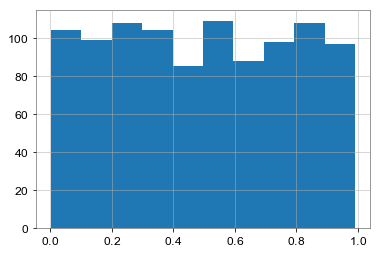

In [74]:
plt.hist(t)

C:\Users\dmber\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


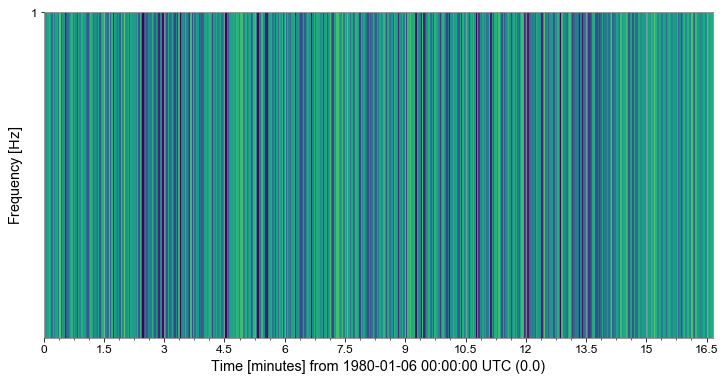

In [75]:
specgram_t = t.spectrogram(2)

# plotting
plot = specgram_t.imshow(norm='log', vmin=0.001, vmax=.999)
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(-1, 1)
plot.show()

C:\Users\dmber\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


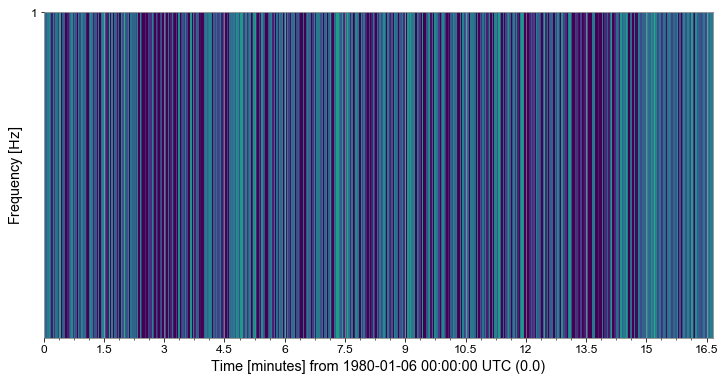

In [76]:
specgram_t = t.spectrogram(2)

# plotting
plot = specgram_t.imshow(norm='log', vmin=0.01, vmax=.99)
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(-1, 1)
plot.show()

C:\Users\dmber\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


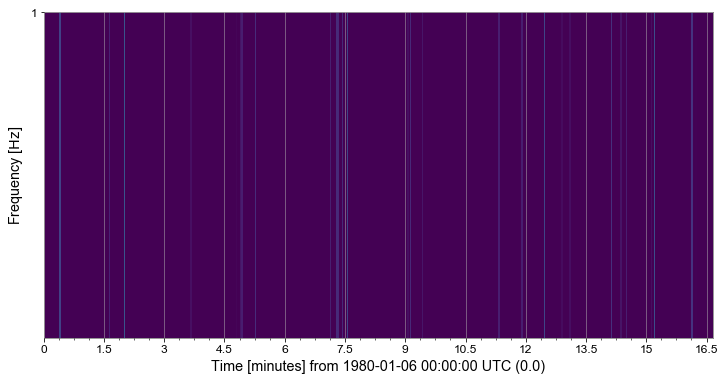

In [77]:
specgram_t = t.spectrogram(2)

# plotting
plot = specgram_t.imshow(norm='log', vmin=0.1, vmax=.90)
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(-1, 1)
plot.show()

In [78]:
plot.save??

Signature: plot.save(*args, **kwargs)
Source:   
    def save(self, *args, **kwargs):
        """Save the figure to disk.

        This method is an alias to :meth:`~matplotlib.figure.Figure.savefig`,
        all arguments are passed directory to that method.
        """
        self.savefig(*args, **kwargs)
File:      c:\users\dmber\anaconda3\lib\site-packages\gwpy\plot\plot.py
Type:      method


In [79]:
# file = './test.jpg'
# plot.save(file)